In [3]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Ginod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Ginod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Ginod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Ginod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Ginod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Ginod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [28]:
# cleaning the dataset we are using
df = pd.read_csv('cars-dataset.csv')

df.columns = df.columns.str.strip().str.lower()

df.rename(columns={
    'fuel capacity': 'fuel capacity (gallons)',
    'displacement': 'displacement (cm3)',
    'power(bhp)': 'power(rpm)',
    'top speed': 'top speed (mph)',
    'torque(lb-ft)': 'torque (lb-ft)',
    'length': 'length (in)',
    'width': 'width (in)',
    'height': 'height (in)',
    'ground clearance': 'Ground Clearance (in)',
    'cargo volume': 'Cargo Volume (cuFT)',
    'unladen weight': 'Unladen Weight (lbs)',
    'gross weight limit': 'Gross Weight Limit (lbs)'
}, inplace=True)
print(df.columns.tolist())
df.drop(columns=['power(kw)', 'torque(nm)'], inplace=True, errors='ignore')

df['power(hp)'] = df['power(hp)'].str.extract(r'(\d+)', expand=False).astype(float)

df['displacement (cm3)'] = df['displacement (cm3)'].str.extract(r'(\d+)', expand=False).astype(float)

df['power(rpm)'] = df['power(rpm)'].str.extract(r'@ (\d+)', expand=False).astype(float)

df['fuel capacity (gallons)'] = df['fuel capacity (gallons)'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['acceleration 0-62 mph (0-100 kph)'] = df['acceleration 0-62 mph (0-100 kph)']\
    .str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['top speed (mph)'] = df['top speed (mph)'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['torque (lb-ft)'] = df['torque (lb-ft)'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['length (in)'] = df['length (in)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['width (in)'] = df['width (in)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['height (in)'] = df['height (in)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['Ground Clearance (in)'] = df['Ground Clearance (in)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['Cargo Volume (cuFT)'] = df['Cargo Volume (cuFT)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['Unladen Weight (lbs)'] = df['Unladen Weight (lbs)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['combined mpg'] = df['combined mpg'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['highway mpg'] = df['highway mpg'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['city mpg'] = df['city mpg'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df['Gross Weight Limit (lbs)'] = df['Gross Weight Limit (lbs)'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

df.to_csv('cars_cleaned_5.csv', index=False)
print("Cleaning complete. Saved as 'cars_cleaned.csv'.")


C:\Users\Ginod\AppData\Local\Temp\ipykernel_20724\607671652.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cars-dataset.csv')


['unnamed: 0', 'model', 'serie', 'company', 'body style', 'segment', 'production years', 'cylinders', 'displacement (cm3)', 'power(hp)', 'power(rpm)', 'power(kw)', 'torque (lb-ft)', 'torque(nm)', 'electrical motor power', 'electrical motor torque', 'fuel system', 'fuel', 'fuel capacity (gallons)', 'top speed (mph)', 'acceleration 0-62 mph (0-100 kph)', 'drive type', 'gearbox', 'front brake', 'rear brake', 'tire size', 'length (in)', 'width (in)', 'height (in)', 'front/rear track', 'wheelbase', 'Ground Clearance (in)', 'aerodynamics (cd)', 'aerodynamics (frontal area)', 'turning circle', 'Cargo Volume (cuFT)', 'Unladen Weight (lbs)', 'Gross Weight Limit (lbs)', 'combined mpg', 'city mpg', 'highway mpg', 'co2 emissions', 'co2 emissions (combined)', 'turning circle (curb to curb)', 'total maximum power', 'power pack', 'nominal capacity', 'top speed (electrical)', 'ev range', 'high mpg', 'extra high mpg', 'medium mpg', 'low mpg', 'total maximum torque', 'maximum capacity', 'specification s

In [30]:
# put the path for the cleaned cars set here
df = pd.read_csv(r'C:\Users\Ginod\cars_cleaned_5.csv', low_memory=False)

# Categorical fields
categorical_arr = np.array([
    '0. Body Style',
    '1. Segment',
    '2. Fuel',
    '3. Drive Type'
])

# get all distinct values for the categorical columns
categorical_options = {
    "Body Style": df['body style'].dropna().unique().tolist(),
    "Segment": df['segment'].dropna().unique().tolist(),
    "Fuel": df['fuel'].dropna().unique().tolist(),
    "Drive Type": df['drive type'].dropna().unique().tolist()
}

continuous_arr = np.array([
    '0. Top Speed (mph)', '1. Acceleration (0-60 mph, seconds)', '2. Fuel Capacity (gallons)',
    '3. Length (inches)', '4. Width (inches)', '5. Height (inches)', '6. Ground Clearance (inches)',
    '7. Cargo Volume (cubic feet)', '8. Unladen Weight (pounds)', '9. Gross Weight (pounds)',
    '10. Combined MPG', '11. City MPG', '12. Highway MPG', '13. Displacement (cm³)',
    '14. Power (HP)', '15. Power (RPM)', '16. Torque (lb-ft)'
])

continuous_prompts = {
    0: "Enter Top Speed in mph (average: 120 mph): ",
    1: "Enter Acceleration (0-60 mph) in seconds (average: 8 sec): ",
    2: "Enter Fuel Capacity in gallons (average: 15 gallons): ",
    3: "Enter Length in inches (average: 180 inches): ",
    4: "Enter Width in inches (average: 70 inches): ",
    5: "Enter Height in inches (average: 55 inches): ",
    6: "Enter Ground Clearance in inches (average: 5.5 inches): ",
    7: "Enter Cargo Volume in cubic feet (average: 15 cubic feet): ",
    8: "Enter Unladen Weight in pounds (average: 3300 lbs): ",
    9: "Enter Gross Weight in pounds (average: 4300 lbs): ",
    10: "Enter Combined MPG (average: 25 mpg): ",
    11: "Enter City MPG (average: 22 mpg): ",
    12: "Enter Highway MPG (average: 30 mpg): ",
    13: "Enter Displacement in cm³ (average: 2000 cm³): ",
    14: "Enter Power in HP (average: 150 HP): ",
    15: "Enter Power RPM (average: 6000 RPM): ",
    16: "Enter Torque in lb-ft (average: 150 lb-ft): "
}

features = {
    0: "top speed (mph)",
    1: "acceleration 0-62 mph (0-100 kph)",
    2: "fuel capacity (gallons)",
    3: "length (in)",
    4: "width (in)",
    5: "height (in)",
    6: "Ground Clearance (in)",
    7: "Cargo Volume (cuFT)",
    8: "Unladen Weight (lbs)",
    9: "Gross Weight Limit (lbs)",
    10: "combined mpg",
    11: "city mpg",
    12: "highway mpg",
    13: "displacement (cm3)",
    14: "power(hp)",
    15: "power(rpm)",
    16: "torque (lb-ft)",
    17: 'body style',
    18: 'segment',
    19: 'fuel',
    20: 'drive type'
}
data = pd.DataFrame()
categ = df.copy()[['body style', 'segment', 'fuel', 'drive type']]
contin = df.copy()[["top speed (mph)",
    "acceleration 0-62 mph (0-100 kph)",
    "fuel capacity (gallons)",
    "length (in)",
    "width (in)",
    "height (in)",
    "Ground Clearance (in)",
    "Cargo Volume (cuFT)",
    "Unladen Weight (lbs)",
    "Gross Weight Limit (lbs)",
    "combined mpg",
    "city mpg",
    "highway mpg",
    "displacement (cm3)",
    "power(hp)",
    "power(rpm)",
    "torque (lb-ft)"]]

used_categorical = set()
used_continuous = set()
chosen_categorical_values = {}
chosen_continuous_values = {}

# categorical input
while True:
    try:
        cat_amount = int(input(f"\nHow many categorical parameters do you want to include? (3-{len(categorical_arr)})\n"))
        if 3 <= cat_amount <= len(categorical_arr):
            break
        else:
            print(f"Please choose between 3 and {len(categorical_arr)}.")
    except ValueError:
        print("Invalid input. Please enter a number.")
# printing out the categorical options and taking categorical option
for _ in range(cat_amount):
    while True:
        print("\nChoose from the following categorical parameters:")
        for idx, name in enumerate(categorical_arr):
            if idx not in used_categorical:
                print(name)

        try:
            parameter = int(input("Enter the number corresponding to your choice: "))
            if parameter in used_categorical or parameter not in range(len(categorical_arr)):
                print("Invalid or already used parameter. Please choose again.")
                continue
            
            field_name = categorical_arr[parameter].split('. ', 1)[1]
            data[features[parameter+17]] = df[features[parameter+17]]
            categ = categ.drop(features[parameter+17], axis = 1)
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

    while True:
        print(f"\nChoose a value for {field_name}:")
        options = categorical_options[field_name]
        for i, option in enumerate(options):
            print(f"{i}. {option}")

        try:
            option_num = int(input("Enter the number corresponding to your choice: "))
            if option_num not in range(len(options)):
                print("Invalid option number. Please choose again.")
                continue

            chosen_categorical_values[features[parameter+17]] = options[option_num]
            used_categorical.add(parameter)
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

# grabbing continuous input
while True:
    try:
        cont_amount = int(input("\nHow many continuous parameters do you want to include? (3-10)\n"))
        if 3 <= cont_amount <= 10:
            break
        else:
            print("Please choose between 3 and 10 parameters.")
    except ValueError:
        print("Invalid input. Please enter a number.")
#choosing which continuous input
for _ in range(cont_amount):
    while True:
        print("\nChoose from the following continuous parameters:")
        for idx, name in enumerate(continuous_arr):
            if idx not in used_continuous:
                print(name)
# taking the continuous input
        try:
            parameter = int(input("Enter the number corresponding to your choice: "))
            if parameter in used_continuous or parameter not in range(len(continuous_arr)):
                print("Invalid or already used parameter. Please choose again.")
                continue
            contin = contin.drop(features[parameter], axis = 1)
            data[features[parameter]] = df[features[parameter]]
            break
        except ValueError:
            print("Invalid input. Please enter a number.")
# converting input to float
    while True:
        try:
            user_value = float(input(continuous_prompts[parameter]))
            chosen_continuous_values[features[parameter]] = user_value
            used_continuous.add(parameter)
            break
        except ValueError:
            print("Invalid input. Please enter a valid number.")
    

# checking all values match up
print("\nYour chosen categorical values:")
for key, value in chosen_categorical_values.items():
    print(f"{key}: {value}")

print("\nYour chosen continuous values:")
for key,value in chosen_continuous_values.items():
    print(f"p{key}: {value}")


Invalid input. Please enter a number.

Choose from the following categorical parameters:
0. Body Style
1. Segment
2. Fuel
3. Drive Type

Choose a value for Body Style:
0. Convertible (spider/spyder, cabrio/cabriolet, drop/open/soft top)
1. Coupé (two-door)
2. SUV (Sports Utility Vehicle)
3. Hatchback
4. Wagon (station wagon, estate, combi, touring)
5. Van
6. Truck

Choose from the following categorical parameters:
1. Segment
2. Fuel
3. Drive Type

Choose a value for Segment:
0. Coupe Cabrio
1. Coupe
2. Roadster & Convertible
3. Medium SUV
4. Premium SUV
5. Medium
6. Compact
7. Large
8. Luxury
9. Large SUV
10. Exotic
11. Premium Coupe
12. Entry Premium
13. Upper Premium
14. Medium Premium
15. Lower Premium
16. Small
17. Mini
18. Small SUV
19. Crossover
20. Small MPV
21. Heavy Duty Pickup
22. Fullsize Pickup
23. Midsize Pickup
24. Large MPV
25. Medium MPV
26. Small Pickup
27. Compact SUV

Choose from the following categorical parameters:
2. Fuel
3. Drive Type

Choose a value for Drive Ty

In [31]:
#encoding data
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

# splitting data
X_train, X_test, y_train, y_test = train_test_split(data_encoded, pd.concat([categ, contin], axis=1), test_size=0.2, random_state=42)

y_train_categ = y_train[categ.columns]
y_train_contin = y_train[contin.columns]
y_test_categ = y_test[categ.columns]
y_test_contin = y_test[contin.columns]
# decoding preperations
label_encoders = {}
y_train_encoded = pd.DataFrame()
y_test_encoded = pd.DataFrame()

for col in y_train_categ:
    le = LabelEncoder()
    y_train_encoded[col] = le.fit_transform(y_train_categ[col])
    y_test_encoded[col] = le.transform(y_test_categ[col])
    label_encoders[col] = le
#training model
clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=0))
clf.fit(X_train, y_train_encoded)

y_train_contin_filled = y_train_contin.fillna(y_train_contin.mean())

regr = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=0))
regr.fit(X_train, y_train_contin_filled)

regr = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=0))
regr.fit(X_train, y_train_contin_filled)

# testing model
y_pred_encoded = clf.predict(X_test)
y_pred_class = pd.DataFrame()
for i, col in enumerate(categ.columns):
    y_pred_class[col] = label_encoders[col].inverse_transform(y_pred_encoded[:, i])

y_pred_regr = pd.DataFrame(regr.predict(X_test), columns=contin.columns)

final_predictions = pd.concat([y_pred_class, y_pred_regr], axis=1)
print("Combined predictions:\n", final_predictions.head())

Combined predictions:
        fuel  top speed (mph)  acceleration 0-62 mph (0-100 kph)  \
0  Gasoline       138.470000                           9.268000   
1  Gasoline       116.014593                          12.493904   
2  Gasoline       154.892000                           7.396000   
3    Diesel       111.767500                          12.595000   
4    Diesel       141.219333                           8.875000   

   fuel capacity (gallons)  length (in)  width (in)  height (in)  \
0                16.668090   192.429000   72.962000    57.919500   
1                14.308657   179.030000   72.868000    57.963400   
2                17.239381   180.311000   69.616000    56.796000   
3                14.743171   167.378433   70.225500    58.127500   
4                17.553856   192.512000   73.158269    59.643075   

   Ground Clearance (in)  Cargo Volume (cuFT)  Unladen Weight (lbs)  \
0               4.620000            17.490000           3446.050000   
1               4.97367


Evaluation for categorical column: fuel
Classification Report:
                               precision    recall  f1-score   support

                       Diesel       0.97      0.98      0.97      1675
                     Electric       0.77      0.76      0.77        67
                      Ethanol       0.67      0.33      0.44        18
                     Gasoline       0.97      0.98      0.97      3970
                       Hybrid       0.59      0.49      0.54        71
                Hybrid Diesel       0.00      0.00      0.00         3
              Hybrid Gasoline       0.56      0.38      0.45        40
Liquefied Petroleum Gas (LPG)       1.00      0.67      0.80         3
                  Mild Hybrid       0.67      0.32      0.44        37
           Mild Hybrid Diesel       0.82      0.70      0.76        20
                  Natural Gas       0.79      0.34      0.48        32
               Plug-in Hybrid       0.62      0.31      0.42        16
            

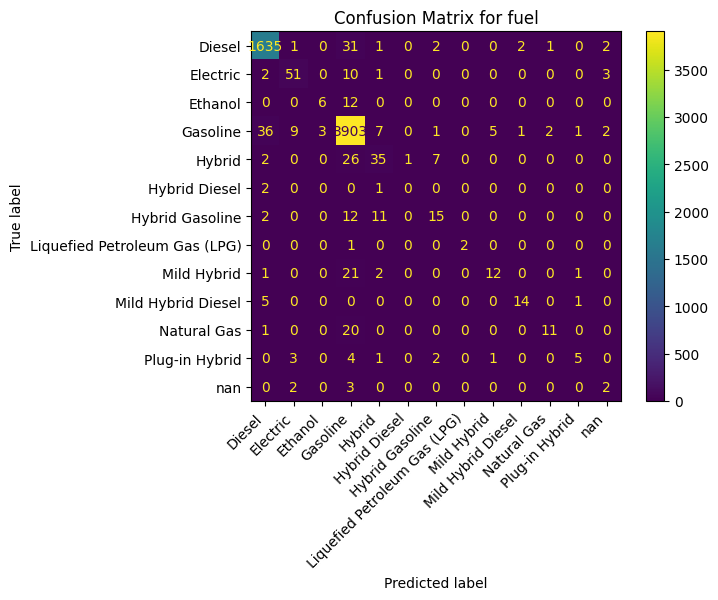


Evaluation for continuous column: top speed (mph)
Accuracy within 10% margin: 34.60%
Mean Absolute Percentage Error: 16.88%


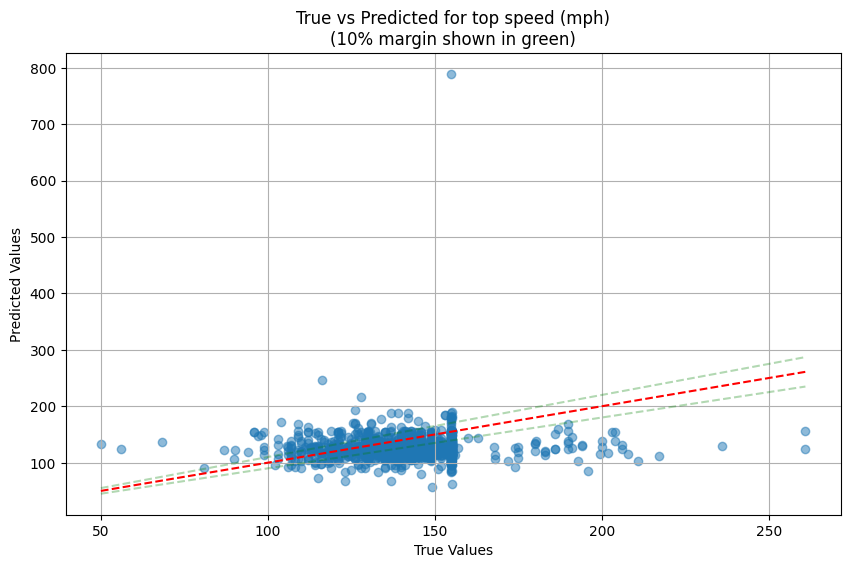


Evaluation for continuous column: acceleration 0-62 mph (0-100 kph)
Accuracy within 10% margin: 16.49%
Mean Absolute Percentage Error: 53.11%


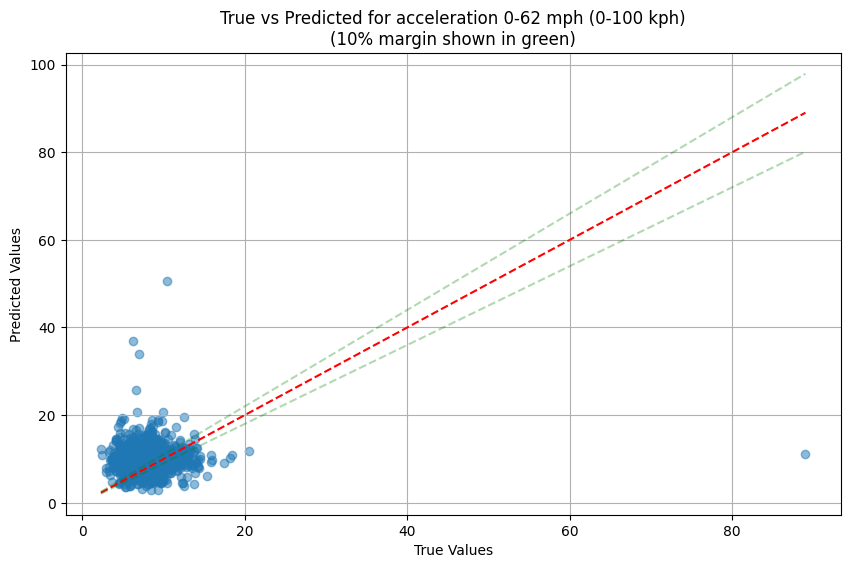


Evaluation for continuous column: fuel capacity (gallons)
Accuracy within 10% margin: 33.33%
Mean Absolute Percentage Error: 26.31%


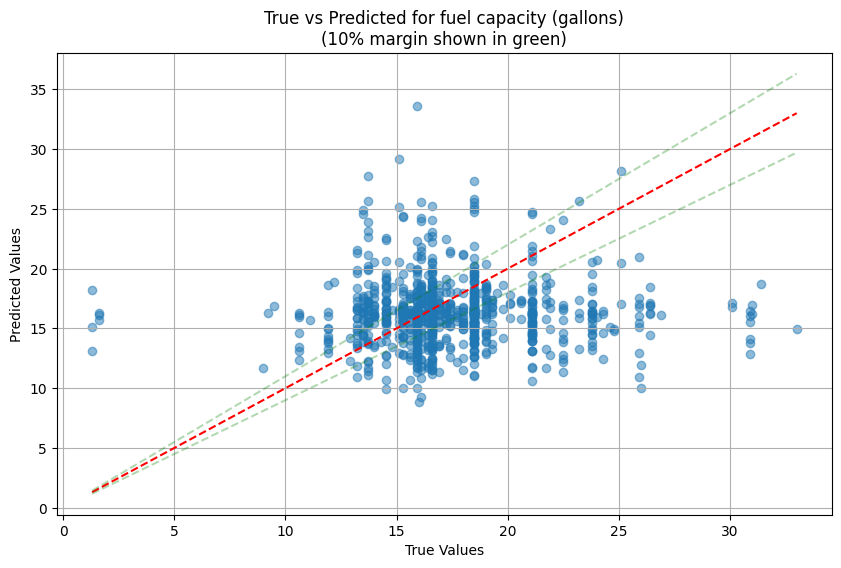


Evaluation for continuous column: length (in)
Accuracy within 10% margin: 62.16%
Mean Absolute Percentage Error: 10.11%


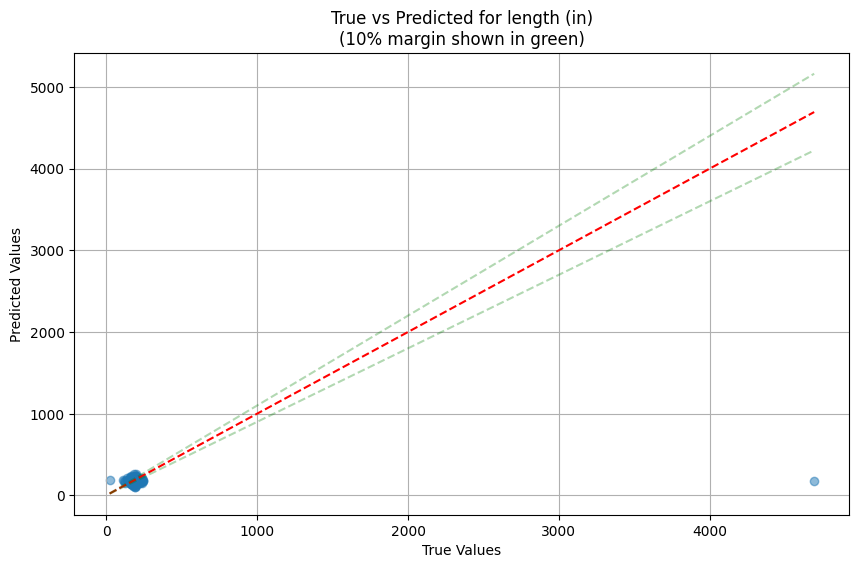


Evaluation for continuous column: width (in)
Accuracy within 10% margin: 77.70%
Mean Absolute Percentage Error: 65.24%


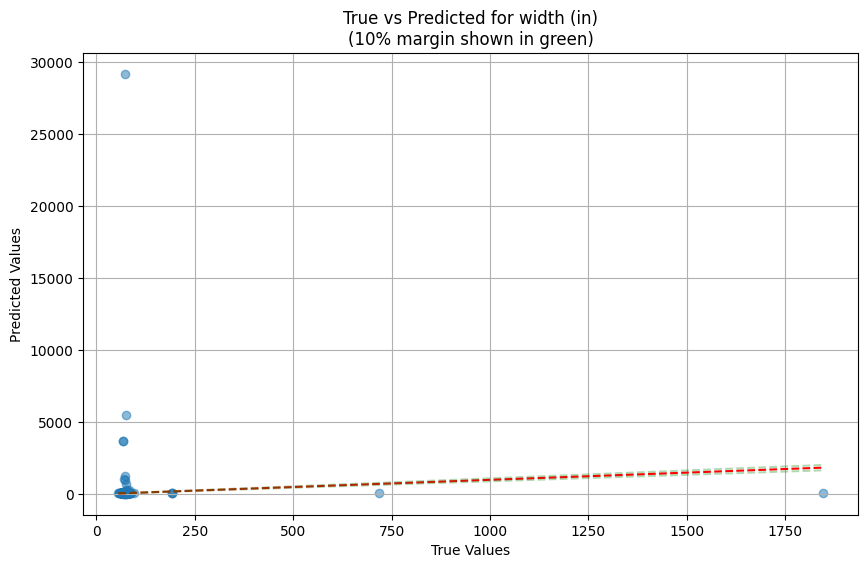


Evaluation for continuous column: height (in)
Accuracy within 10% margin: 59.33%
Mean Absolute Percentage Error: 10.97%


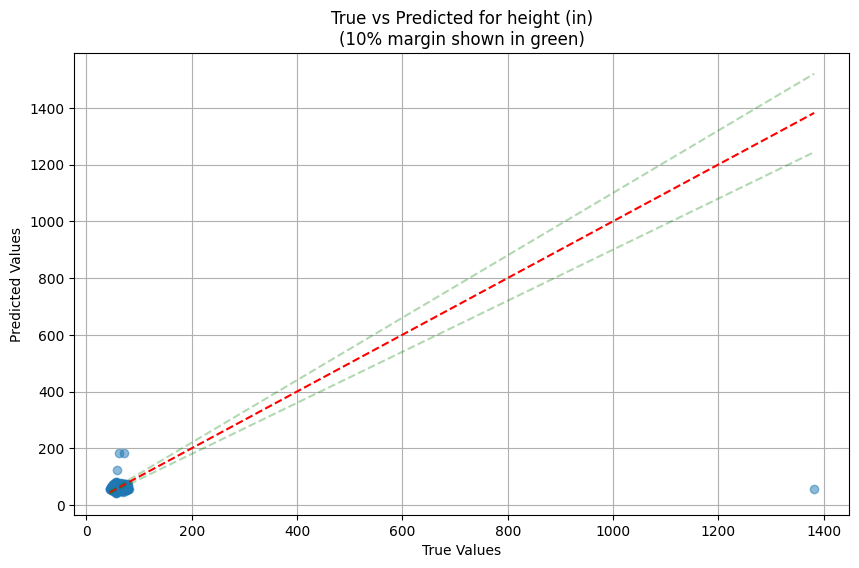


Evaluation for continuous column: Ground Clearance (in)
Accuracy within 10% margin: 25.94%
Mean Absolute Percentage Error: 45.08%


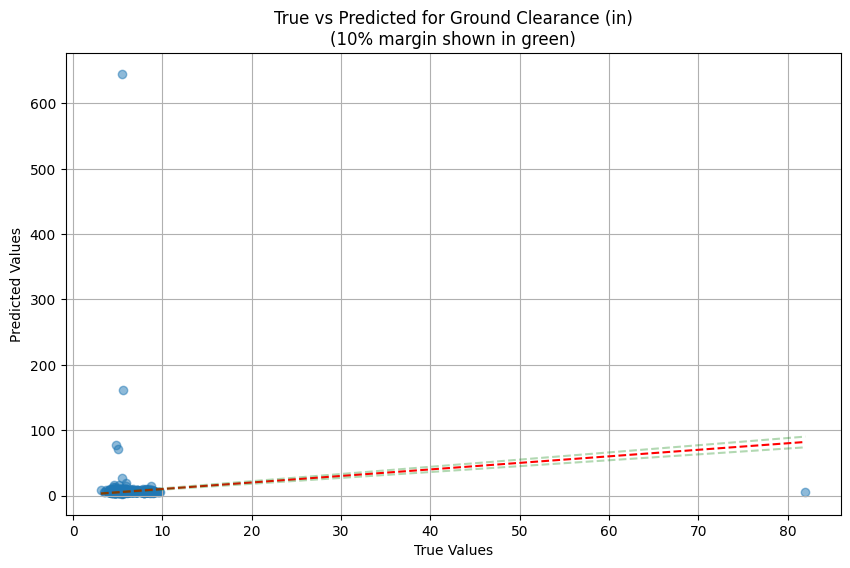


Evaluation for continuous column: Cargo Volume (cuFT)
Accuracy within 10% margin: 23.50%
Mean Absolute Percentage Error: 50.94%


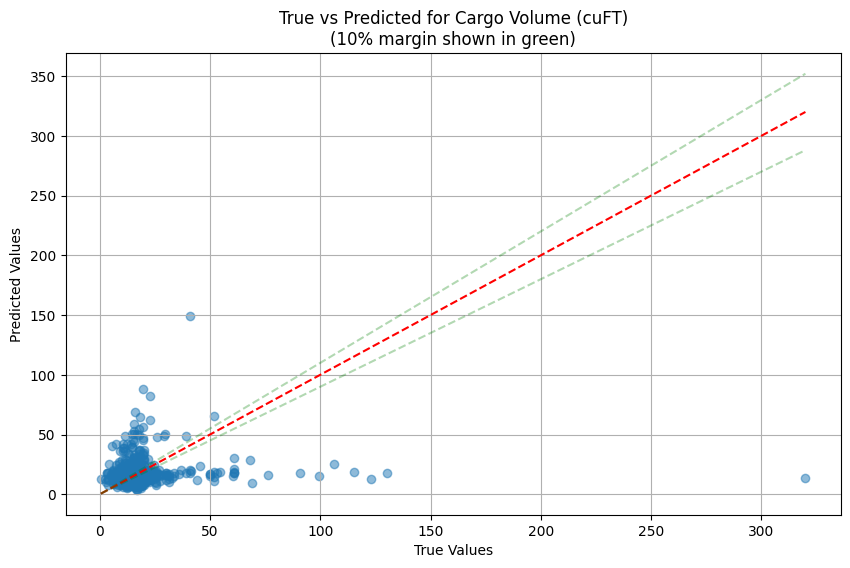


Evaluation for continuous column: Unladen Weight (lbs)
Accuracy within 10% margin: 24.32%
Mean Absolute Percentage Error: 28.54%


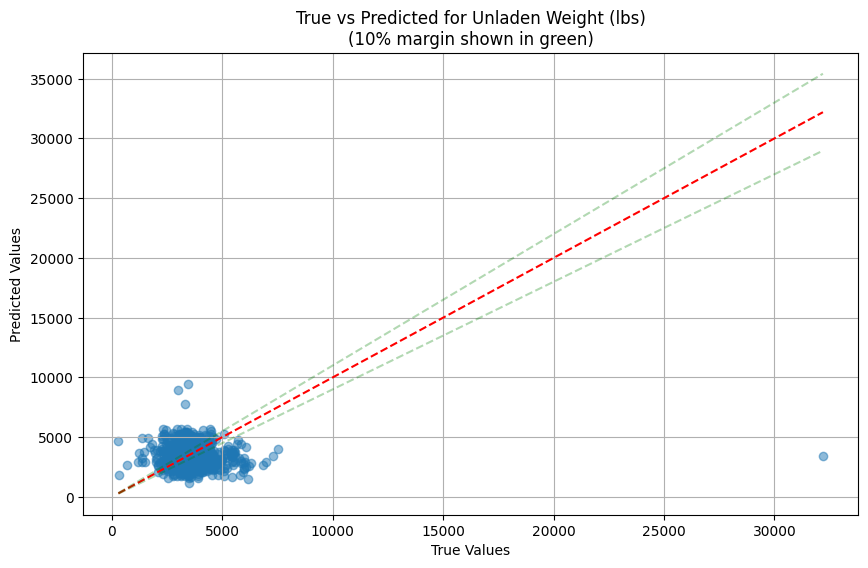


Evaluation for continuous column: Gross Weight Limit (lbs)
Accuracy within 10% margin: 33.33%
Mean Absolute Percentage Error: 20.17%


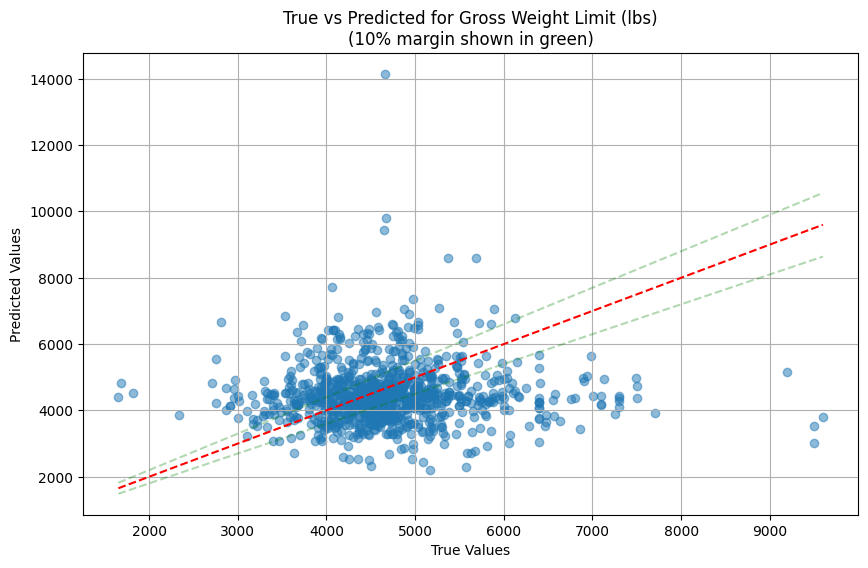


Evaluation for continuous column: torque (lb-ft)
Accuracy within 10% margin: 11.02%
Mean Absolute Percentage Error: 108.16%


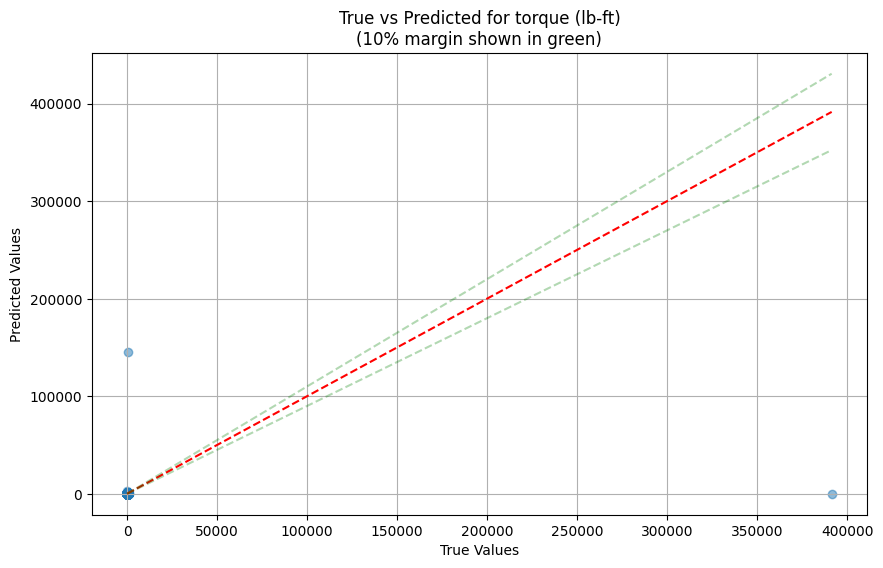

In [36]:
def evaluate_predictions(y_true, y_pred, categorical_cols, continuous_cols):
    
    # Evaluate predictions by:
    # Creating confusion matrices for categorical columns
    # Calculating accuracy within 10% margin for continuous columns
    
    # Parameters:
    # y_true: DataFrame containing true values
    # y_pred: DataFrame containing predicted values
    # categorical_cols: List of categorical column names
    # continuous_cols: List of continuous column names
    
    # Convert all categorical values to strings to avoid type issues
    y_true_cat = y_true[categorical_cols].astype(str)
    y_pred_cat = y_pred[categorical_cols].astype(str)
    
    # Evaluate categorical predictions
    for col in categorical_cols:
        if col in y_true.columns and col in y_pred.columns:
            print(f"\nEvaluation for categorical column: {col}")
            
            # Get unique classes from both true and predicted
            unique_classes = np.unique(np.concatenate([y_true_cat[col].unique(), y_pred_cat[col].unique()]))
            
            print("Classification Report:")
            print(classification_report(y_true_cat[col], y_pred_cat[col], 
                                      labels=unique_classes, zero_division=0))
            
            # Create confusion matrix
            cm = confusion_matrix(y_true_cat[col], y_pred_cat[col], labels=unique_classes)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=unique_classes)
            disp.plot()
            plt.title(f"Confusion Matrix for {col}")
            plt.xticks(rotation=45, ha='right')
            plt.show()
    
    # Evaluate continuous predictions with 10% margin
    for col in continuous_cols:
        if col in y_true.columns and col in y_pred.columns:
            print(f"\nEvaluation for continuous column: {col}")
            
            # Convert to numeric, handling any non-numeric values
            true_vals = pd.to_numeric(y_true[col], errors='coerce')
            pred_vals = pd.to_numeric(y_pred[col], errors='coerce')
            
            # Remove NaN values that might have resulted from conversion
            mask = ~np.isnan(true_vals) & ~np.isnan(pred_vals)
            true_vals = true_vals[mask]
            pred_vals = pred_vals[mask]
            
            if len(true_vals) == 0:
                print(f"Skipping {col} - no valid numeric values found")
                continue
            
            # Calculate absolute percentage error
            abs_perc_error = np.abs((true_vals - pred_vals) / true_vals) * 100
            
            # Count predictions within 10% margin
            correct = np.sum(abs_perc_error <= 10)
            accuracy = correct / len(true_vals) * 100

            print(f"Accuracy within 10% margin: {accuracy:.2f}%")

            # Calculate MAE as an alternative metric
            mae = np.mean(np.abs(true_vals - pred_vals))
            print(f"Mean Absolute Percentage Error: {np.mean(abs_perc_error):.2f}%")
            
            # Plot actual vs predicted with 10% margin lines
            plt.figure(figsize=(10, 6))
            plt.scatter(true_vals, pred_vals, alpha=0.5)
            plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)], 'r--')
            
            # Add 10% margin lines
            plt.plot([min(true_vals), max(true_vals)], 
                    [min(true_vals)*0.9, max(true_vals)*0.9], 'g--', alpha=0.3)
            plt.plot([min(true_vals), max(true_vals)], 
                    [min(true_vals)*1.1, max(true_vals)*1.1], 'g--', alpha=0.3)
            
            plt.xlabel('True Values')
            plt.ylabel('Predicted Values')
            plt.title(f'True vs Predicted for {col}\n(10% margin shown in green)')
            plt.grid(True)
            plt.show()

# Usage example:
evaluate_predictions(y_test, final_predictions, categ.columns, contin.columns)

In [33]:
# chosen_arr = pd.DataFrame()
chosen_arr = pd.DataFrame({**chosen_categorical_values, **chosen_continuous_values}, index=[0])
chosen_arr_copy = chosen_arr.copy()

#encoding it
for col in chosen_arr.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    chosen_arr[col] = le.fit_transform(chosen_arr[col])

label_encoders = {}
y_train_encoded = pd.DataFrame()
y_test_encoded = pd.DataFrame()


for col in y_train_categ:
    le = LabelEncoder()
    y_train_encoded[col] = le.fit_transform(y_train_categ[col])
    y_test_encoded[col] = le.transform(y_test_categ[col])
    label_encoders[col] = le

# prediction/decoding
result_category = clf.predict(chosen_arr)
result_class = pd.DataFrame()
for i, col in enumerate(categ.columns):
    result_class[col] = label_encoders[col].inverse_transform(result_category[:, i])

result_regr = pd.DataFrame(regr.predict(chosen_arr), columns=contin.columns)

print("Your chosen values were:\n\n",chosen_arr_copy,"\n")


final_result = pd.concat([result_class, result_regr], axis=1)
print("Your results were:\n\n", final_result)

Your chosen values were:

                                           body style segment  \
0  Convertible (spider/spyder, cabrio/cabriolet, ...   Coupe   

         drive type  combined mpg  city mpg  highway mpg  displacement (cm3)  \
0  Rear Wheel Drive          25.0      22.0         30.0              2000.0   

   power(hp)  power(rpm)  
0      150.0      6000.0   

Your results were:

        fuel  top speed (mph)  acceleration 0-62 mph (0-100 kph)  \
0  Gasoline       126.649399                           9.364313   

   fuel capacity (gallons)  length (in)  width (in)  height (in)  \
0                14.699784   170.219845     70.0536    56.727575   

   Ground Clearance (in)  Cargo Volume (cuFT)  Unladen Weight (lbs)  \
0               6.099175            16.039924               3084.06   

   Gross Weight Limit (lbs)  torque (lb-ft)  
0               3843.803002      143.934873  


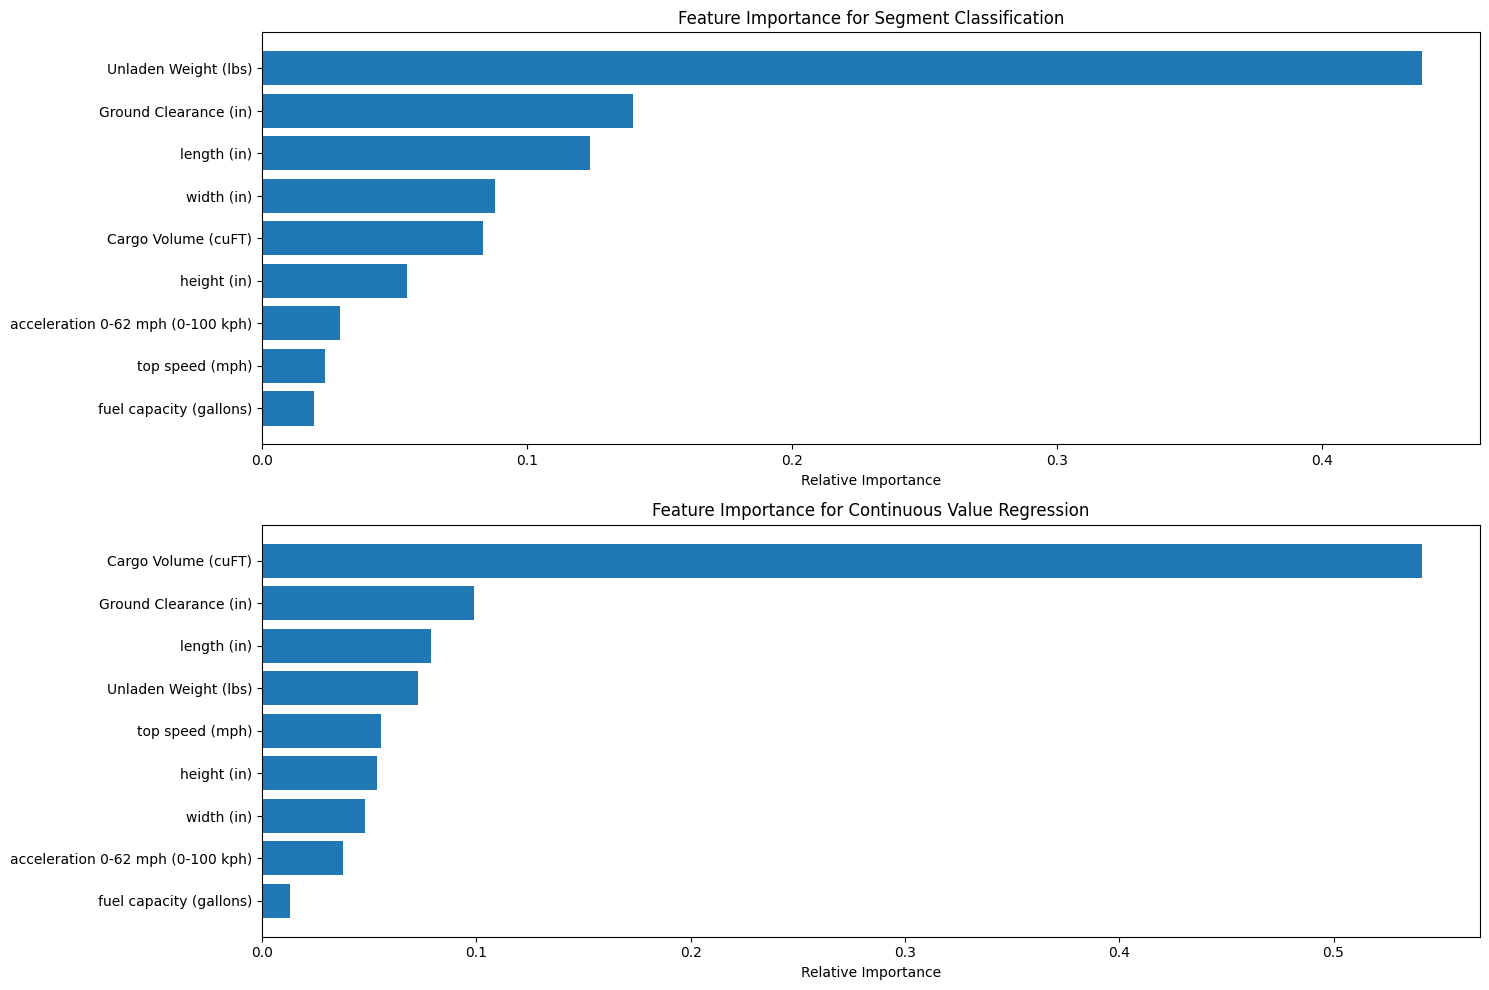

In [34]:
# Feature Importance Visualization
plt.figure(figsize=(15, 10))

# For classification (segment prediction)
plt.subplot(2, 1, 1)
classifier = clf.estimators_[0]  # Get the first classifier (for segment)
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features_list = [features[i] for i in range(len(importances))]  # Using your features dictionary

plt.title('Feature Importance for Segment Classification')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()

# For regression (continuous variables)
plt.subplot(2, 1, 2)
regressor = regr.estimators_[0]  # Get the first regressor
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importance for Continuous Value Regression')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()